In [1]:
from __future__ import print_function
import os
import sys
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [2]:
os.chdir('E:/Practical Time Series')

In [3]:
df = pd.read_csv('datasets/PRSA_data_2010.1.1-2014.12.31.csv')

In [4]:
print('Shape of the dataframe:', df.shape)

Shape of the dataframe: (43824, 13)


In [5]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [6]:
df['datetime'] = df[['year', 'month', 'day', 'hour']].apply(lambda row: datetime.datetime(year=row['year'], month=row['month'], day=row['day'], 
                                                                                          hour=row['hour']), axis=1)
df.sort_values('datetime', ascending=True, inplace=True)

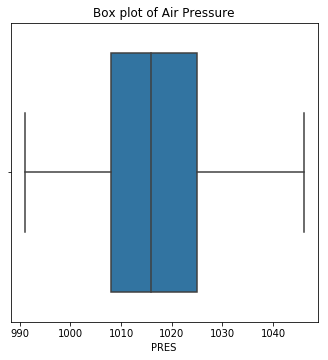

In [7]:
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(df['PRES'])
g.set_title('Box plot of Air Pressure')
plt.savefig('plots/Section 2/_05_01.png', format='png', dpi=300)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


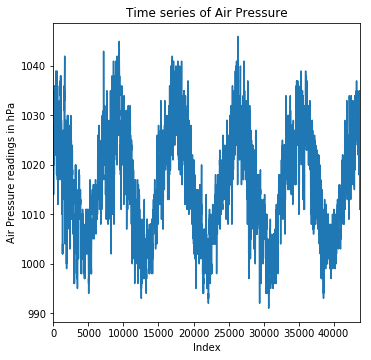

In [8]:
plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df['PRES'])
g.set_title('Time series of Air Pressure')
g.set_xlabel('Index')
g.set_ylabel('Air Pressure readings in hPa')
plt.savefig('plots/Section 2/_05_02.png', format='png', dpi=300)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df['scaled_PRES'] = scaler.fit_transform(np.array(df['PRES']).reshape(-1, 1))

In [10]:
split_date = datetime.datetime(year=2014, month=1, day=1, hour=0)
df_train = df.loc[df['datetime']<split_date]
df_val = df.loc[df['datetime']>=split_date]
print('Shape of train:', df_train.shape)
print('Shape of test:', df_val.shape)

Shape of train: (35064, 15)
Shape of test: (8760, 15)


In [11]:
df_train.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime,scaled_PRES
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01 00:00:00,0.545455
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01 01:00:00,0.527273
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01 02:00:00,0.509091
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01 03:00:00,0.509091
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01 04:00:00,0.490909


In [12]:
df_val.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime,scaled_PRES
35064,35065,2014,1,1,0,24.0,-20,7.0,1014.0,NW,143.48,0,0,2014-01-01 00:00:00,0.418182
35065,35066,2014,1,1,1,53.0,-20,7.0,1013.0,NW,147.50,0,0,2014-01-01 01:00:00,0.400000
35066,35067,2014,1,1,2,65.0,-20,6.0,1013.0,NW,151.52,0,0,2014-01-01 02:00:00,0.400000
35067,35068,2014,1,1,3,70.0,-20,6.0,1013.0,NW,153.31,0,0,2014-01-01 03:00:00,0.400000
35068,35069,2014,1,1,4,79.0,-18,3.0,1012.0,cv,0.89,0,0,2014-01-01 04:00:00,0.381818


In [13]:
df_val.reset_index(drop=True, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


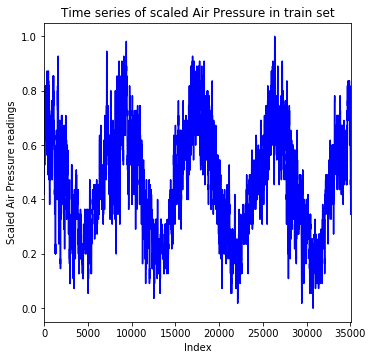

In [14]:
plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df_train['scaled_PRES'], color='b')
g.set_title('Time series of scaled Air Pressure in train set')
g.set_xlabel('Index')
g.set_ylabel('Scaled Air Pressure readings')
plt.savefig('plots/Section 2/_05_03.png', format='png', dpi=300)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


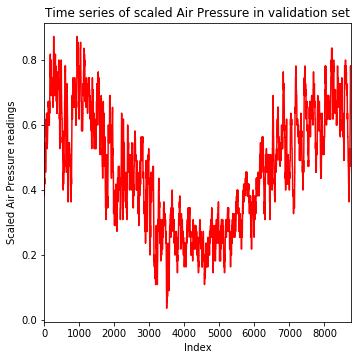

In [15]:
plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df_val['scaled_PRES'], color='r')
g.set_title('Time series of scaled Air Pressure in validation set')
g.set_xlabel('Index')
g.set_ylabel('Scaled Air Pressure readings')
plt.savefig('plots/Section 2/_05_04.png', format='png', dpi=300)

In [16]:
def makeXy(ts, nb_timesteps):
    
    X = []
    y = []
    for i in range(nb_timesteps, ts.shape[0]):
        X.append(list(ts.loc[i-nb_timesteps:i-1]))
        y.append(ts.loc[i])
    X, y = np.array(X), np.array(y)
    return X, y

In [17]:
X_train, y_train = makeXy(df_train['scaled_PRES'], 7)
print('Shape of train arrays:', X_train.shape, y_train.shape)

Shape of train arrays: (35057, 7) (35057,)


In [18]:
X_val, y_val = makeXy(df_val['scaled_PRES'], 7)
print('Shape of validation arrays:', X_val.shape, y_val.shape)

Shape of validation arrays: (8753, 7) (8753,)


In [19]:
from keras.layers import Dense, Input, Dropout
from keras.optimizers import SGD
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

Using Theano backend.


In [20]:
input_layer = Input(shape=(7,), dtype='float32')

In [21]:
dense1 = Dense(32, activation='linear')(input_layer)
dense2 = Dense(16, activation='linear')(dense1)
dense3 = Dense(16, activation='linear')(dense2)

In [22]:
dropout_layer = Dropout(0.2)(dense3)

In [23]:
output_layer = Dense(1, activation='linear')(dropout_layer)

In [24]:
ts_model = Model(inputs=input_layer, outputs=output_layer)
ts_model.compile(loss='mean_squared_error', optimizer='adam')
ts_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 7)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                256       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 1,073
Trainable params: 1,073
Non-trainable params: 0
_________________________________________________________________


In [25]:
save_weights_at = os.path.join('datasets', 'PRSA_data_2010.1.1-2014.12.31.{epoch:02d}-{val_loss:.4f}.hdf5') 
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)
ts_model.fit(x=X_train, y=y_train, batch_size=16, epochs=20,
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True)

Train on 35057 samples, validate on 8753 samples
Epoch 1/20
35057/35057 [==============================] - 4s 104us/step - loss: 0.0054 - val_loss: 2.8233e-04
Epoch 2/20
35057/35057 [==============================] - 3s 98us/step - loss: 0.0013 - val_loss: 0.0011
Epoch 3/20
35057/35057 [==============================] - 4s 101us/step - loss: 9.0026e-04 - val_loss: 4.2767e-04
Epoch 4/20
35057/35057 [==============================] - 4s 101us/step - loss: 8.3653e-04 - val_loss: 2.0213e-04
Epoch 5/20
35057/35057 [==============================] - 4s 101us/step - loss: 8.1383e-04 - val_loss: 1.8369e-04
Epoch 6/20
35057/35057 [==============================] - 4s 101us/step - loss: 8.1211e-04 - val_loss: 2.6580e-04
Epoch 7/20
35057/35057 [==============================] - 3s 94us/step - loss: 7.7181e-04 - val_loss: 2.3394e-04
Epoch 8/20
35057/35057 [==============================] - 4s 111us/step - loss: 7.6865e-04 - val_loss: 3.0904e-04
Epoch 9/20
35057/35057 [=============================

In [26]:
best_model = load_model(os.path.join('datasets', 'PRSA_data_2010.1.1-2014.12.31.01-0.0003.hdf5'))
preds = best_model.predict(X_val)
pred_PRES = scaler.inverse_transform(preds)
pred_PRES = np.squeeze(pred_PRES)

In [27]:
from sklearn.metrics import r2_score

In [28]:
r2 = r2_score(df_val['PRES'].loc[7:], pred_PRES)
print('R-squared for the validation set:', round(r2,4))

R-squared for the validation set: 0.9911


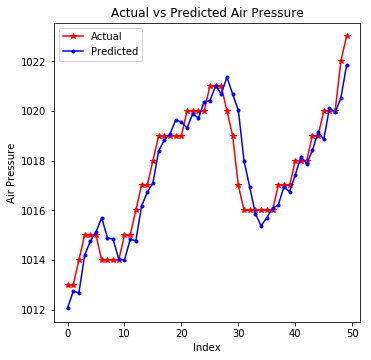

In [29]:
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(50), df_val['PRES'].loc[7:56], linestyle='-', marker='*', color='r')
plt.plot(range(50), pred_PRES[:50], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Air Pressure')
plt.ylabel('Air Pressure')
plt.xlabel('Index')
plt.savefig('plots/Section 5/_05_05.png', format='png', dpi=300)

In [30]:
"""
Air Pressure time series forecasting by LSTM
"""

'\nAir Pressure time series forecasting by LSTM\n'

In [31]:
from keras.layers.recurrent import LSTM

In [32]:
X_train, X_val = X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), X_val.reshape((X_val.shape[0], X_val.shape[1], 1)) 
print('Shape of 3D arrays:', X_train.shape, X_val.shape)

Shape of 3D arrays: (35057, 7, 1) (8753, 7, 1)


In [33]:
input_layer = Input(shape=(7,1), dtype='float32')
lstm_layer = LSTM(64, input_shape=(7,1), return_sequences=False)(input_layer)

In [34]:
dropout_layer = Dropout(0.2)(lstm_layer)
output_layer = Dense(1, activation='linear')(dropout_layer)

In [35]:
ts_model = Model(inputs=input_layer, outputs=output_layer)
ts_model.compile(loss='mean_squared_error', optimizer='adam')
ts_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 7, 1)              0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [36]:
save_weights_at = os.path.join('datasets', 'PRSA_data_2010.1.1-2014.12.31.{epoch:02d}-{val_loss:.4f}.hdf5') 
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)
ts_model.fit(x=X_train, y=y_train, batch_size=16, epochs=20,
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True)

Train on 35057 samples, validate on 8753 samples
Epoch 1/20
35057/35057 [==============================] - 63s 2ms/step - loss: 0.0027 - val_loss: 7.0340e-04
Epoch 2/20
35057/35057 [==============================] - 65s 2ms/step - loss: 8.8329e-04 - val_loss: 3.5916e-04
Epoch 3/20
35057/35057 [==============================] - 69s 2ms/step - loss: 5.3382e-04 - val_loss: 2.0543e-04
Epoch 4/20
35057/35057 [==============================] - 70s 2ms/step - loss: 3.7929e-04 - val_loss: 1.8109e-04
Epoch 5/20
35057/35057 [==============================] - 80s 2ms/step - loss: 3.4607e-04 - val_loss: 1.4559e-04
Epoch 6/20
35057/35057 [==============================] - 78s 2ms/step - loss: 3.2847e-04 - val_loss: 1.3931e-04
Epoch 7/20
35057/35057 [==============================] - 73s 2ms/step - loss: 3.1898e-04 - val_loss: 1.6837e-04
Epoch 8/20
35057/35057 [==============================] - 86s 2ms/step - loss: 3.1661e-04 - val_loss: 1.3714e-04
Epoch 9/20
35057/35057 [===========================

In [37]:
best_model = load_model(os.path.join('datasets', 'PRSA_data_2010.1.1-2014.12.31.01-0.0005.hdf5'))
preds = best_model.predict(X_val)
pred_PRES = scaler.inverse_transform(preds)
pred_PRES = np.squeeze(pred_PRES)

In [38]:
from sklearn.metrics import r2_score
r2 = r2_score(df_val['PRES'].loc[7:], pred_PRES)
print('R-squared on validation set of the original air pressure:', r2)

R-squared on validation set of the original air pressure: 0.983752932554


Text(0.5,0,'Index')

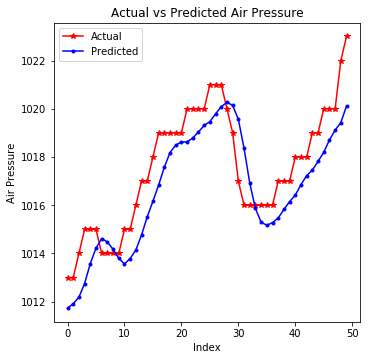

In [39]:
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(50), df_val['PRES'].loc[7:56], linestyle='-', marker='*', color='r')
plt.plot(range(50), pred_PRES[:50], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Air Pressure')
plt.ylabel('Air Pressure')
plt.xlabel('Index')

In [40]:
"""
Air Pressure time series forecasting by GRU
"""

'\nAir Pressure time series forecasting by GRU\n'

In [41]:
from keras.layers.recurrent import GRU

In [42]:
X_train, X_val = X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), X_val.reshape((X_val.shape[0], X_val.shape[1], 1)) 
print('Shape of 3D arrays:', X_train.shape, X_val.shape)

Shape of 3D arrays: (35057, 7, 1) (8753, 7, 1)


In [43]:
input_layer = Input(shape=(7,1), dtype='float32')
gru_layer = GRU(64, input_shape=(7,1), return_sequences=False)(input_layer)

In [44]:
dropout_layer = Dropout(0.2)(gru_layer)
output_layer = Dense(1, activation='linear')(dropout_layer)

In [45]:
ts_model = Model(inputs=input_layer, outputs=output_layer)
ts_model.compile(loss='mse', optimizer='adam')
ts_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 7, 1)              0         
_________________________________________________________________
gru_1 (GRU)                  (None, 64)                12672     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 12,737
Trainable params: 12,737
Non-trainable params: 0
_________________________________________________________________


In [46]:
save_weights_at = os.path.join('datasets', 'PRSA_data_2010.1.1-2014.12.31.{epoch:02d}-{val_loss:.4f}.hdf5')
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)
ts_model.fit(x=X_train, y=y_train, batch_size=16, epochs=20,
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True)

Train on 35057 samples, validate on 8753 samples
Epoch 1/20
35057/35057 [==============================] - 115s 3ms/step - loss: 0.0022 - val_loss: 2.4144e-04
Epoch 2/20
35057/35057 [==============================] - 89s 3ms/step - loss: 6.8237e-04 - val_loss: 1.5906e-04
Epoch 3/20
35057/35057 [==============================] - 90s 3ms/step - loss: 4.0608e-04 - val_loss: 1.4510e-04
Epoch 4/20
35057/35057 [==============================] - 82s 2ms/step - loss: 3.3841e-04 - val_loss: 1.3599e-04
Epoch 5/20
35057/35057 [==============================] - 93s 3ms/step - loss: 3.1629e-04 - val_loss: 1.3732e-04
Epoch 6/20
35057/35057 [==============================] - 96s 3ms/step - loss: 3.1252e-04 - val_loss: 1.7282e-04
Epoch 7/20
35057/35057 [==============================] - 42s 1ms/step - loss: 3.0940e-04 - val_loss: 1.3214e-04
Epoch 8/20
35057/35057 [==============================] - 98s 3ms/step - loss: 3.0711e-04 - val_loss: 1.3372e-04
Epoch 9/20
35057/35057 [==========================

In [50]:
best_model = load_model(os.path.join('datasets', 'PRSA_data_2010.1.1-2014.12.31.03-0.0001.hdf5'))
preds = best_model.predict(X_val)
pred_PRES = scaler.inverse_transform(preds)
pred_PRES = np.squeeze(pred_PRES)

In [51]:
from sklearn.metrics import r2_score
r2 = r2_score(df_val['PRES'].loc[7:], pred_PRES)
print('R-squared on validation set of the original air pressure:', r2)

R-squared on validation set of the original air pressure: 0.995429677578


Text(0.5,0,'Index')

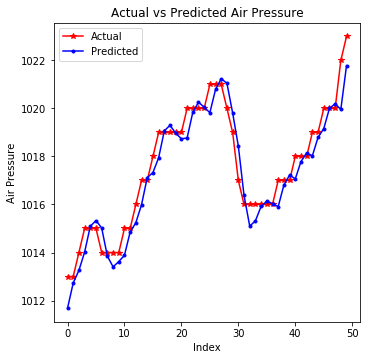

In [52]:
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(50), df_val['PRES'].loc[7:56], linestyle='-', marker='*', color='r')
plt.plot(range(50), pred_PRES[:50], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Air Pressure')
plt.ylabel('Air Pressure')
plt.xlabel('Index')

In [57]:
"""
Air Pressure time series forecasting by 1D Convolution
"""

'\nAir Pressure time series forecasting by 1D Convolution\n'

In [58]:
from keras.layers import Flatten
from keras.layers.convolutional import ZeroPadding1D
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import AveragePooling1D

In [59]:
X_train, X_val = X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), X_val.reshape((X_val.shape[0], X_val.shape[1], 1)) 
print('Shape of arrays after reshaping:', X_train.shape, X_val.shape)

Shape of arrays after reshaping: (35057, 7, 1) (8753, 7, 1)


In [60]:
input_layer = Input(shape=(7,1), dtype='float32')

In [61]:
zeropadding_layer = ZeroPadding1D(padding=1)(input_layer)

In [62]:
conv1D_layer = Conv1D(64, 3, strides=1, use_bias=True)(zeropadding_layer)

In [63]:
avgpooling_layer = AveragePooling1D(pool_size=3, strides=1)(conv1D_layer)

In [64]:
flatten_layer = Flatten()(avgpooling_layer)
dropout_layer = Dropout(0.2)(flatten_layer)
output_layer = Dense(1, activation='linear')(dropout_layer)

In [65]:
ts_model = Model(inputs=input_layer, outputs=output_layer)
ts_model.compile(loss='mean_absolute_error', optimizer='adam')
ts_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 7, 1)              0         
_________________________________________________________________
zero_padding1d_1 (ZeroPaddin (None, 9, 1)              0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 7, 64)             256       
_________________________________________________________________
average_pooling1d_1 (Average (None, 5, 64)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 320)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 320)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 321       
Total para

In [66]:
save_weights_at = os.path.join('datasets', 'PRSA_data_2010.1.1-2014.12.31.{epoch:02d}-{val_loss:.4f}.hdf5') 
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)
ts_model.fit(x=X_train, y=y_train, batch_size=16, epochs=20,
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True)

WARNING (theano.tensor.blas): We did not found a dynamic library into the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Train on 35057 samples, validate on 8753 samples
Epoch 1/20
35057/35057 [==============================] - 6s 181us/step - loss: 0.0281 - val_loss: 0.0144
Epoch 2/20
35057/35057 [==============================] - 6s 181us/step - loss: 0.0177 - val_loss: 0.0109
Epoch 3/20
35057/35057 [==============================] - 7s 197us/step - loss: 0.0153 - val_loss: 0.0113
Epoch 4/20
35057/35057 [==============================] - 7s 199us/step - loss: 0.0145 - val_loss: 0.0105
Epoch 5/20
35057/35057 [==============================] - 8s 225us/step - loss: 0.0139 - val_loss: 0.0104
Epoch 6/20
35057/35057 [==============================] - 5s 134us/step - loss: 0.0138 - val_loss: 0.0108
Epoch 7/20
35057/35057 [==============================] - 5s 143us/step - loss: 0.0134 - val_loss: 0.0095
Epoch 8/20
35057/35057 [==============================] - 5s 129us/step - loss: 0.0134 - val_loss: 0.0183
Epoch 9/20
35057/35057 [==============================] - 5s 133us/step - loss: 0.0135 - val_loss: 0.01

In [67]:
best_model = load_model(os.path.join('datasets', 'PRSA_data_2010.1.1-2014.12.31.15-0.0095.hdf5'))
preds = best_model.predict(X_val)
pred_PRES = np.squeeze(scaler.inverse_transform(preds))

In [68]:
from sklearn.metrics import r2_score
r2 = r2_score(df_val['PRES'].loc[7:], pred_PRES)
print('R-squared for the validation set:', round(r2, 4))

R-squared for the validation set: 0.9951


Text(0.5,0,'Index')

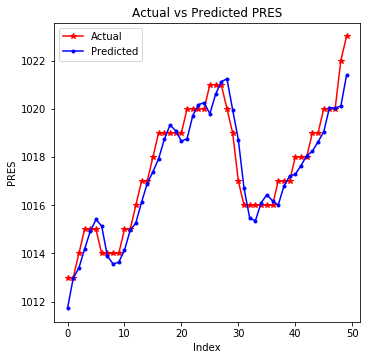

In [69]:
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(50), df_val['PRES'].loc[7:56], linestyle='-', marker='*', color='r')
plt.plot(range(50), pred_PRES[:50], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted PRES')
plt.ylabel('PRES')
plt.xlabel('Index')